<a href="https://colab.research.google.com/github/VEDAVYAS28/bike_price_prediction/blob/main/Bike_Prices_Prediction_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title of Project
#Bike Price Prediction


---



#Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

#Import Data


In [3]:
df= pd.read_csv('/content/bike price.csv')

In [4]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


#Remove Missing Values

In [6]:
df=df.dropna()

In [7]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [8]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [9]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [10]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [11]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [12]:
df[['Seller_Type']].value_counts()

Seller_Type
0              623
1                3
dtype: int64

In [13]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

In [14]:
df.replace({'Owner':{'1st owner':0, '2nd owner':1, '3rd owner':2, '4th owner':3}},inplace=True) 

In [15]:
df[['Owner']].value_counts()

Owner
0        556
1         66
2          3
3          1
dtype: int64

#Define Target Variable (y) and Feature Variables (X

In [16]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [17]:
df.shape

(626, 8)

In [18]:
#X=pd.get_dummies(X, colums=['Seller_Type', 'Owner'],drop_first=True)

In [19]:
y = df['Selling_Price']

In [20]:
y.shape

(626,)

In [21]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [22]:
X=df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [23]:
#X=df.drop(['Brand','Model', Selling_Price'],axis=1)

In [24]:
X.shape

(626, 5)

In [25]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


#Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=142529)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((438, 5), (188, 5), (438,), (188,))

#Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train, y_train)

LinearRegression()

#Predict test Data

In [32]:
y_pred= lr.predict(X_test)

In [33]:
y_pred.shape

(188,)

In [34]:
y_pred

array([ 82812.18611865,  25495.64098159,  54425.60944076,  57308.53420253,
       101952.56245975,  68840.26653638,  15288.32480946, 118769.69427498,
        32069.45832079,   2165.24031246,  44233.25066168, 121013.995232  ,
       493296.25423761,  81779.58674769,   8356.99438691,  31539.8323624 ,
        38286.17372214,  83761.95064897, 111358.66124479,  23278.82200512,
        54613.67528353,  45291.67827019,  31688.22963996,  62756.94652659,
        68840.26653638, 316367.33891181,  36943.09823602, 120831.69257523,
        16830.03045415, 382479.99953875,  45402.57673528,  39605.90362649,
        40942.78580207, 131730.49549448,  54847.38640497,  52747.1115875 ,
        78406.54682756,  39242.16435883, 120206.85235211, 121442.42201765,
        83721.68167661,  92115.95700897,  27438.50426762,  31669.93444995,
        59040.80650489,  23290.58869792, 124419.75790123,  64375.78409381,
        52981.06872685,  51366.62951272, 127721.27228899,  45150.50447797,
        39839.73601284,  

#Model Accuracy

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
mean_squared_error(y_test,y_pred)

599512979.6801785

In [37]:
mean_absolute_error(y_test,y_pred)

11405.261433528518

In [38]:
r2_score(y_test, y_pred)

0.8876024964263423

#Prediction

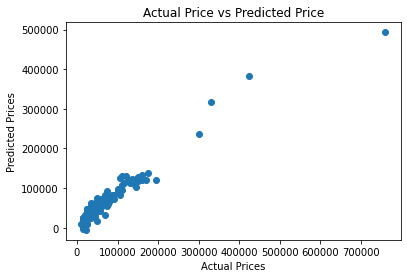

In [39]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

#Future Prediction

In [40]:


df_new =df .sample(1)
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
67,Honda,Honda Activa [2000-2015],25000,2015,0,0,25000,50267.0


In [41]:
df_new.shape

(1, 8)

In [42]:
X_new = df_new.drop(['Brand', 'Model','Selling_Price'], axis =1)
y_pred_new = lr.predict(X_new)
y_pred_new

array([36774.24870083])